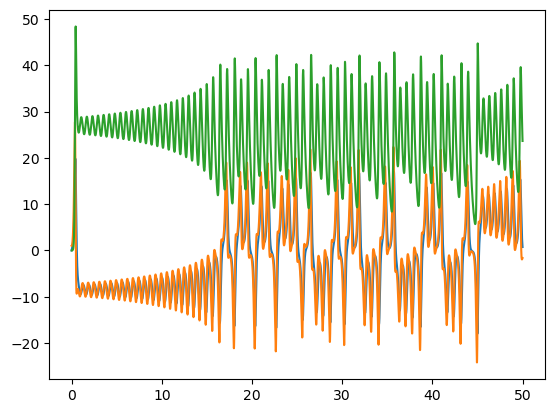

In [17]:
# LORENTZ EQUATIONS

from typing import *
import math
import numpy as np
import matplotlib.pyplot as plt

#constants
sigma = 10
l = 28
c = 8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma *(y-x)
    fy = l*x - y -x*z 
    fz = x*y - c*z
    return np.array([fx,fy,fz],float)

#start and stop point and stepsize
a = 0.0
b = 50.0
N = 100000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

#initial condition
r = np.array([0.0,1.0,0.0], float)

# Range-Kutta, Fourth Order
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints, xpoints)
plt.plot(tpoints, ypoints)
plt.plot(tpoints,zpoints)

plt.show()




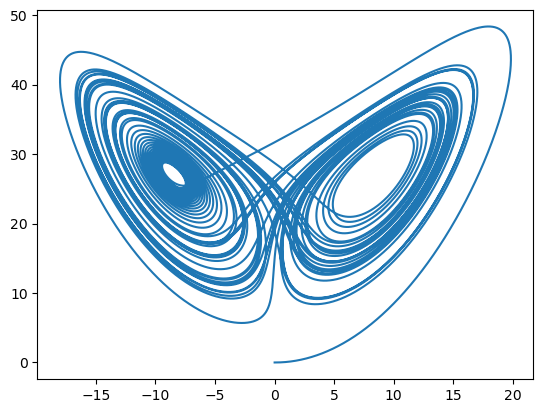

In [22]:
plt.plot(xpoints,zpoints)
#plt.plot(xpoints,ypoints)
#plt.plot(ypoints,zpoints)
plt.show()

In [10]:
# LORENTZ EQUATIONS

from typing import *
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Constants
sigma = 10
l = 28
c = 8/3

def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma * (y - x)
    fy = l * x - y - x * z
    fz = x * y - c * z
    return np.array([fx, fy, fz], float)

# Start and stop point and stepsize
a = 0.0
b = 50.0
N = 5000  # Reduce the number of points for a more manageable animation
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
zpoints = []

# Initial condition
r = np.array([0.0, 1.0, 0.0], float)

# Range-Kutta, Fourth Order
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Setting up the plot
fig, ax = plt.subplots()
ax.set_xlim(min(xpoints), max(xpoints))
ax.set_ylim(min(zpoints), max(zpoints))

line, = ax.plot([], [], lw=2)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    # Update line with the first i points
    line.set_data(xpoints[:i], zpoints[:i])
    return line,

# Creating the animation with more frames
anim = FuncAnimation(fig, animate, init_func=init, frames=len(xpoints), interval=1, blit=True)

# Converting animation to HTML5 video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

# Closing the plot
plt.close()
